In [94]:
#So, until 1972, people didn't know how to analyze data which has a non-normal error distribution in the dependent variable.
# Then, in 1972,
# came a breakthrough by John Nelder and Robert Wedderburn in the form of Generalized Linear Models.

# How can you evaluate Logistic Regression model fit and accuracy ?
# Akaike Information Criteria (AIC) - > Smaller the better.
# Null Deviance and Residual Deviance -> The larger the difference between null and residual deviance, better the model.
# Confusion Matrix

In [117]:
data <- read.csv("C:/Users/radha31/Downloads/Marks.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))

'data.frame':	100 obs. of  3 variables:
 $ exam_1  : num  34.6 30.3 35.8 60.2 79 ...
 $ exam_2  : num  78 43.9 72.9 86.3 75.3 ...
 $ admitted: int  0 0 0 1 1 0 1 1 1 1 ...
NULL


In [198]:
head(data)
factorA <- factor(data$admitted)
lv <- levels(factorA)
lv


exam_1,exam_2,admitted
34.62366,78.02469,0
30.28671,43.89500,0
35.84741,72.90220,0
60.18260,86.30855,1
79.03274,75.34438,1
45.08328,56.31637,0


[1] "0" "1"

In [119]:
table(data$admitted)




 0  1 
40 60 

In [201]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(data), 0.8*nrow(data))  # row indices for training data
trainingData <- data[trainingRowIndex, ]  # model training data
testData  <- data[-trainingRowIndex, ]   # test data

dim(testData )

[1] 20  3

In [205]:
logitMod <- glm(admitted ~ exam_1+exam_2, 
                data=trainingData, 
                family=binomial(link="logit"))

#predicted <- plogis(predict(logitMod, testData))  # predicted scores
# or
predicted <- predict(logitMod, testData, type="response")  # predicted scores
predicted

1          3          4          5          7         14         23 
0.11677869 0.06150727 0.98680538 0.99721057 0.99825223 0.99970487 0.01299598 
        29         33         41         44         59         60         68 
0.12555708 0.19259270 0.96550421 0.54592624 0.98147293 0.99380766 0.01704211 
        69         76         82         88         96        100 
0.99989585 0.99990545 0.96964816 0.99964895 0.85932950 0.99952828

In [204]:
#confusion matrix
table(testData$admitted, predicted > 0.8)

   
    FALSE TRUE
  0     7    0
  1     0   13

In [206]:
logitMod


Call:  glm(formula = admitted ~ exam_1 + exam_2, family = binomial(link = "logit"), 
    data = trainingData)

Coefficients:
(Intercept)       exam_1       exam_2  
   -22.7769       0.1889       0.1821  

Degrees of Freedom: 79 Total (i.e. Null);  77 Residual
Null Deviance:	    108.4 
Residual Deviance: 37.74 	AIC: 43.74

In [153]:
# predicted

In [20]:
 # plot(logitMod)
#response = Admitted ( which we want to know) - Output

#Residual V Fitted – Predicted Value
#Normal Q-Q – Theoretical quantile
#Scale – Location - Predicted value
#Residuary v leverage - Leverage

In [207]:
summary(logitMod)


Call:
glm(formula = admitted ~ exam_1 + exam_2, family = binomial(link = "logit"), 
    data = trainingData)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.18789  -0.23090   0.02051   0.27290   1.67564  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -22.77691    5.74852  -3.962 7.43e-05 ***
exam_1        0.18894    0.04894   3.861 0.000113 ***
exam_2        0.18215    0.04739   3.843 0.000121 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 108.441  on 79  degrees of freedom
Residual deviance:  37.737  on 77  degrees of freedom
AIC: 43.737

Number of Fisher Scoring iterations: 7


In [208]:
library(car)
vif(logitMod)

# variables in the model have VIF should be below 4. best below 2.5

exam_1   exam_2 
3.870382 3.870382

In [39]:
#library(InformationValue)
#optCutOff <- optimalCutoff(data$admitted, predicted) 
#misClassError(data$admitted, predicted, threshold = 0.7)

In [40]:
# ROC 
# ROC # ROC  Receiver Operating Characteristics Curve traces 
# the percentage of # true positives accurately predicted by a given logit model 
# as the prediction probability cutoff is lowered from 1 to 0

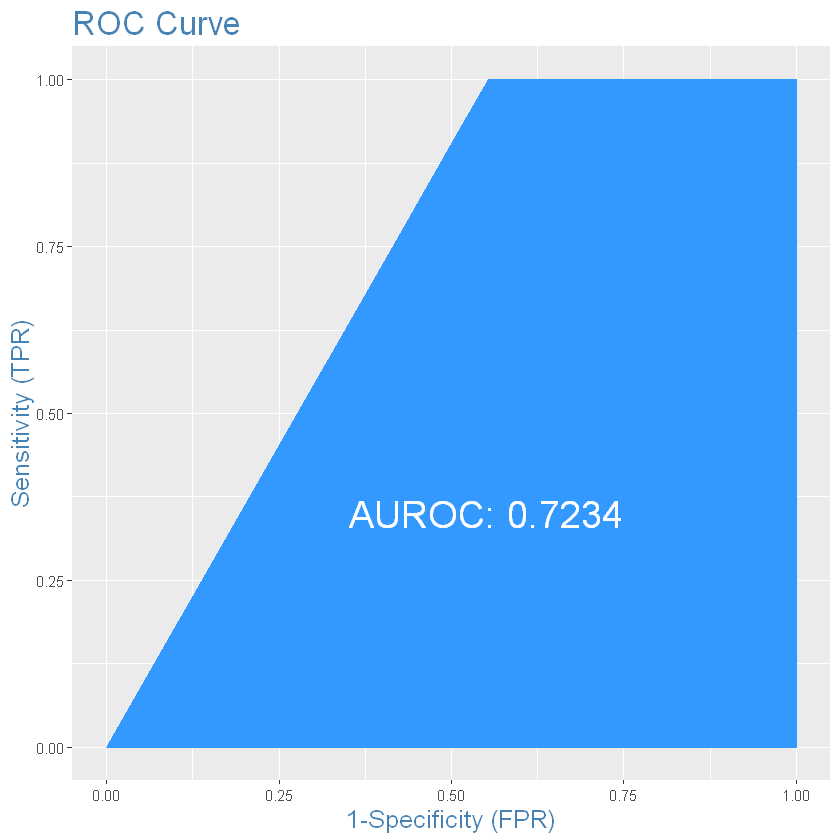

In [209]:
#options(warn=-1)
plotROC(testData, predicted)
#  Greater the area under the ROC curve, better the predictive ability of the model.
# The above model has area under ROC curve 44%, Average, 80% and above  which is pretty good.

In [219]:
Concordance(testData$admitted, predicted)
# Concordance is the percentage of pairs, whose scores of actual positive’s are greater than the scores of actual negative’s. For a perfect model, 
# this will be 100%. So, the higher the concordance, the better is the quality of model.

$Concordance
[1] 1

$Discordance
[1] 0

$Tied
[1] 0

$Pairs
[1] 91

In [47]:
# Specificity and Sensitivity
# Sensitivity (or True Positive Rate) is the percentage of 1’s (actuals) correctly predicted by the model, while,
# specificity is the percentage of 0’s (actuals) correctly predicted.
# Specificity can also be calculated as 1 − False Positive Rate.

In [213]:
sensitivity(testData$admitted, predicted, threshold = 0.5)

[1] 1

In [214]:
specificity(testData$admitted, predicted, threshold = 0.5)

[1] 0.8571429

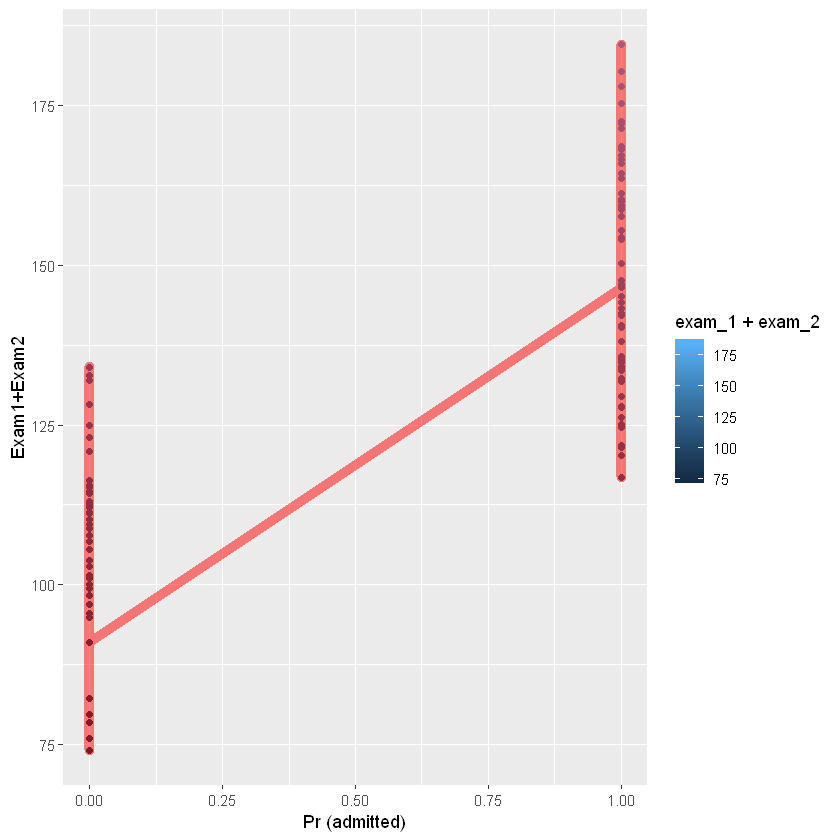

In [215]:
library("ggplot2")
pl <- ggplot(data, aes(admitted, as.numeric(exam_1+exam_2),
                       color=exam_1+exam_2)) +
  stat_smooth(method="loess", formula=admitted~exam_1 +exam_2,
              alpha=0.5, size=4, aes(fill=admitted)) +
  geom_point(position=position_jitter(height=0.03, width=0)) +
  geom_line( color='red', size=3, alpha=0.5)+
  xlab("Pr (admitted)") + ylab("Exam1+Exam2")

print(pl)

In [216]:
# ggsave("AP1d.pdf", plot=pl)


confusionMatrix(testData$admitted, predicted > 0.5)

,0,1
0,6,0
1,1,13


In [217]:
library(InformationValue)
optCutOff <- optimalCutoff(testData$admitted, predicted)[1] 
optCutOff

[1] 0.5499054

In [218]:
misClassError(testData$admitted, predicted, threshold = optCutOff)

[1] 0